In [22]:
import hist
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [23]:
geometries = ['current-geometry', 'iRPC-added-geometry', 'target-geometry']
sample_types = ['2025-mu-pt100']
data = []
for geometry in geometries:
    sample = uproot.open(f"output/{sample_types[0]}-{geometry}.root:muonAnalyzer/MuonTree").arrays(library="np")
    flat_sample = {key: np.concatenate(sample[key]) for key in sample.keys()}
    data.append(flat_sample)

In [24]:
print(data[0].keys())

dict_keys(['simMuon_pt', 'simMuon_eta', 'simMuon_phi', 'recoMuon_pt', 'recoMuon_eta', 'recoMuon_phi', 'recoMuon_isGlobal', 'recoMuon_isStandalone'])


In [25]:
print("="*80)
print(f"{sample_types[0]}-{geometries[0]}, N_SimMuon: {len(data[0]['simMuon_pt'])}")
print(f"{sample_types[0]}-{geometries[0]}, N_RecoMuon: {len(data[0]['recoMuon_pt'])}")
print(f"{sample_types[0]}-{geometries[0]}, N_StandAloneMuon: {len(data[0]['recoMuon_pt'][data[0]['recoMuon_isStandalone']])}")
print(f"{sample_types[0]}-{geometries[0]}, N_GlobalMuon: {len(data[0]['recoMuon_pt'][data[0]['recoMuon_isGlobal']])}")
print("="*80)
print(f"{sample_types[0]}-{geometries[1]}, N_SimMuon: {len(data[1]['simMuon_pt'])}")
print(f"{sample_types[0]}-{geometries[1]}, N_RecoMuon: {len(data[1]['recoMuon_pt'])}")
print(f"{sample_types[0]}-{geometries[1]}, N_StandAloneMuon: {len(data[1]['recoMuon_pt'][data[1]['recoMuon_isStandalone']])}")
print(f"{sample_types[0]}-{geometries[1]}, N_GlobalMuon: {len(data[1]['recoMuon_pt'][data[1]['recoMuon_isGlobal']])}")
print("="*80)
print(f"{sample_types[0]}-{geometries[2]}, N_SimMuon: {len(data[2]['simMuon_pt'])}")
print(f"{sample_types[0]}-{geometries[2]}, N_RecoMuon: {len(data[2]['recoMuon_pt'])}")
print(f"{sample_types[0]}-{geometries[2]}, N_StandAloneMuon: {len(data[2]['recoMuon_pt'][data[2]['recoMuon_isStandalone']])}")
print(f"{sample_types[0]}-{geometries[2]}, N_GlobalMuon: {len(data[2]['recoMuon_pt'][data[2]['recoMuon_isGlobal']])}")
print("="*80)

2025-mu-pt100-current-geometry, N_SimMuon: 950000
2025-mu-pt100-current-geometry, N_RecoMuon: 935078
2025-mu-pt100-current-geometry, N_StandAloneMuon: 926220
2025-mu-pt100-current-geometry, N_GlobalMuon: 919652
2025-mu-pt100-iRPC-added-geometry, N_SimMuon: 920000
2025-mu-pt100-iRPC-added-geometry, N_RecoMuon: 905728
2025-mu-pt100-iRPC-added-geometry, N_StandAloneMuon: 897393
2025-mu-pt100-iRPC-added-geometry, N_GlobalMuon: 891156
2025-mu-pt100-target-geometry, N_SimMuon: 890000
2025-mu-pt100-target-geometry, N_RecoMuon: 876169
2025-mu-pt100-target-geometry, N_StandAloneMuon: 867961
2025-mu-pt100-target-geometry, N_GlobalMuon: 861784


In [26]:
h_sim_eta_list = []
h_reco_eta_list = []
h_sa_eta_list = []  
h_gb_eta_list = []

for sample in data:
    sim_eta = sample['simMuon_eta']
    reco_eta = sample['recoMuon_eta']
    is_standalone = sample['recoMuon_isStandalone']
    is_global = sample['recoMuon_isGlobal']
    sa_eta = reco_eta[is_standalone]
    gb_eta = reco_eta[is_global]

    h_sim_eta = hist.Hist.new.Regular(100, -2.5, 2.5).Weight()
    h_reco_eta = hist.Hist.new.Regular(100, -2.5, 2.5).Weight()
    h_sa_eta = hist.Hist.new.Regular(100, -2.5, 2.5).Weight()
    h_gb_eta = hist.Hist.new.Regular(100, -2.5, 2.5).Weight()

    h_sim_eta.fill(sim_eta)
    h_reco_eta.fill(reco_eta)
    h_sa_eta.fill(sa_eta)
    h_gb_eta.fill(gb_eta)
    
    h_sim_eta_list.append(h_sim_eta)
    h_reco_eta_list.append(h_reco_eta)
    h_sa_eta_list.append(h_sa_eta)
    h_gb_eta_list.append(h_gb_eta)

In [27]:
#print(h_sim_eta_list[0].values())
#print(h_sim_eta_list[1].values())
#print(h_sim_eta_list[2].values())

#print(h_gb_eta_list[0].values())
#print(h_gb_eta_list[1].values())
#print(h_gb_eta_list[2].values())

print(h_gb_eta_list[0].values()/h_sim_eta_list[0].values())
print(h_gb_eta_list[1].values()/h_sim_eta_list[1].values())
print(h_gb_eta_list[2].values()/h_sim_eta_list[2].values())

[0.00294118 0.47014847 0.99661376 0.99904802 1.00074365 0.99871877
 0.99926238 1.00021229 0.99831933 1.00072909 1.         0.99874634
 1.00116538 0.9985403  1.00021238 0.99968146 0.99936521 1.
 1.00031659 0.9990402  1.00031345 1.00031609 0.99906005 1.00062247
 0.99925816 0.99905043 1.00116377 0.99694061 0.99947335 0.99904863
 0.99904347 0.9990566  0.99862536 0.99626746 0.9984132  0.99864541
 1.00052681 1.00020683 0.99947479 0.99968092 1.00031499 1.00062999
 1.00010522 0.99947879 0.99289298 0.98689453 0.99707358 0.99873857
 1.0011551  0.99914512 0.99967976 0.99968786 0.99947241 0.99852817
 0.98439822 0.9878228  0.99793836 0.99989278 1.00115777 0.99803068
 1.00064247 1.00051878 0.99989314 1.00073855 0.99915913 0.99862098
 0.99672547 0.99907569 0.99764454 0.99967866 0.99936231 1.00031652
 0.99697822 1.00084246 0.9980088  1.00082178 0.99884539 0.99989388
 1.0004207  0.99870045 1.00031939 0.99948187 1.00083273 0.99946876
 0.99905907 1.00021097 1.00042364 0.99989621 0.99979208 1.
 1.00136929

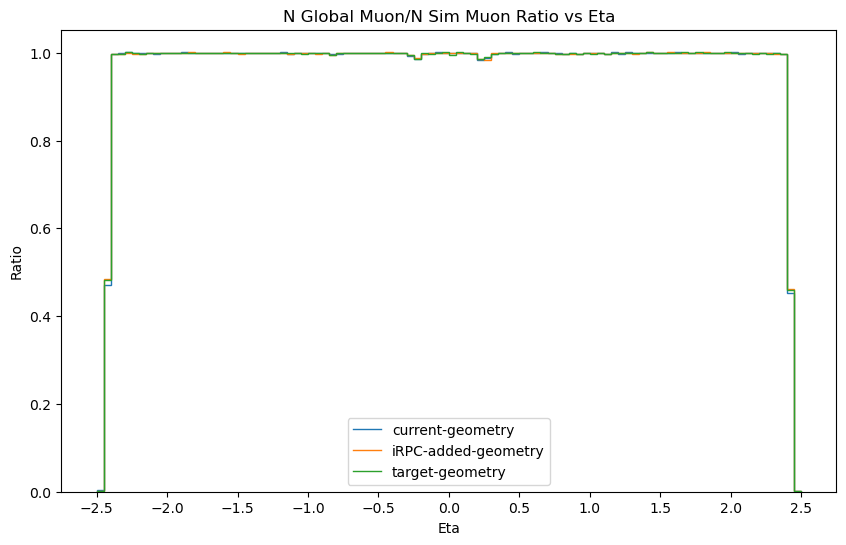

In [28]:
plt.figure(figsize=(10, 6))
bin_edges = h_sim_eta_list[0].axes[0].edges

for i in range(len(h_sim_eta_list)):
    ratio = h_gb_eta_list[i].values() / h_sim_eta_list[i].values()
    plt.stairs(ratio, bin_edges, label=f'{geometries[i]}')

#ratio = h_gb_eta_list[0].values() / h_sim_eta_list[0].values()
#plt.stairs(ratio, bin_edges, label='Reco/Sim Ratio')
plt.xlabel('Eta')
plt.xticks(np.linspace(-2.5, 2.5, 11))

plt.ylabel('Ratio')
#plt.ylim(0.8, 1.1)

plt.title('N Global Muon/N Sim Muon Ratio vs Eta')
plt.legend()
#plt.grid(True)
plt.show()